In [ ]:
from captcha.image import ImageCaptcha

image_captcha = ImageCaptcha()

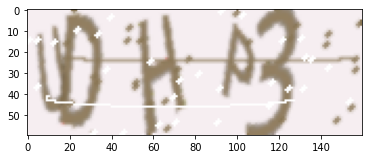

./captcha_UDHP3.png has been created.


In [2]:
from captcha.image import ImageCaptcha
from captcha.audio import AudioCaptcha
import matplotlib.pyplot as plt
import random

# The number list, lower case character list and upper case character list are used to generate captcha text.
number_list = ['0','1','2','3','4','5','6','7','8','9']

alphabet_lowercase = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

alphabet_uppercase = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

# This function will create a random captcha string text based on above three list.
# The input parameter is the captcha text length.
def create_random_captcha_text(captcha_string_size=10):

    captcha_string_list = []

    base_char = alphabet_lowercase + alphabet_uppercase + number_list

    for i in range(captcha_string_size):

        # Select one character randomly.
        char = random.choice(base_char)

        # Append the character to the list.
        captcha_string_list.append(char)

    captcha_string = ''

    # Change the character list to string.    
    for item in captcha_string_list:
        captcha_string += str(item)

    return captcha_string

# This function will create a fully digital captcha string text.
def create_random_digital_text(captcha_string_size=10):

    captcha_string_list = []
    # Loop in the number list and return a digital captcha string list
    for i in range(captcha_string_size):
        char = random.choice(number_list)
        captcha_string_list.append(char)
        
    captcha_string = ''

    # Convert the digital list to string.    
    for item in captcha_string_list:
        captcha_string += str(item)

    return captcha_string

# Create an image captcha with special text.
def create_image_captcha(captcha_text):
    image_captcha = ImageCaptcha()
    # Create the captcha image.
    image = image_captcha.generate_image(captcha_text)

    # Add noise curve for the image.
    image_captcha.create_noise_curve(image, image.getcolors())

    # Add noise dots for the image.
    image_captcha.create_noise_dots(image, image.getcolors())

    # Save the image to a png file.
    image_file = "./captcha_"+captcha_text + ".png"
    image_captcha.write(captcha_text, image_file)

    # Display the image in a matplotlib viewer.
    plt.imshow(image)
    plt.show()

    print(image_file + " has been created.")

# Create an audio captcha file.    
def create_audio_captcha():

    # Create the audio captcha with the specified voice wav file library folder.
    # Each captcha char should has it's own directory under the specified folder ( such as ./voices),
    # for example ./voices/a/a.wav will be played when the character is a.
    # If you do not specify your own voice file library folder, the default built-in voice library which has only digital voice file will be used. 
    # audio_captcha = AudioCaptcha(voicedir='./voices')

    # Create an audio captcha which use digital voice file only.
    audio_captcha = AudioCaptcha()

    # Because we use the default module voice library, so we can only generate digital text voice.
    captcha_text = create_random_digital_text()

    # Generate the audio captcha file.
    audio_data = audio_captcha.generate(captcha_text)

    # Save the autiod captcha file.
    audio_file = "./captcha_"+captcha_text+'.wav'
    audio_captcha.write(captcha_text, audio_file)

    print(audio_file + " has been created.")

if __name__ == '__main__':
    # Create random text.
    captcha_text = create_random_captcha_text(captcha_string_size = 5)

    # Create image captcha.
    create_image_captcha(captcha_text)
